In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import random as rnd

# Laboratorio 3

## Parte 1: NUMPY

### Ejercicio 1

In [2]:
array_booleano = np.ones(1000)
array_booleano = np.array(array_booleano, dtype=bool)
print('El tamaño de bytes del array de 1000 booleanoes es: ', array_booleano.itemsize)

El tamaño de bytes del array de 1000 booleanoes es:  1


### Ejercicio 2

In [3]:
enteros = list(range(1,1001))
enteros_pares = []
for i in enteros:
    if (i % 2) == 0:
        enteros_pares.append(i)
enteros_pares.sort(reverse=True)
enteros_pares = np.array(enteros_pares)
print(enteros_pares[enteros_pares.size-10:])

[20 18 16 14 12 10  8  6  4  2]


### Ejercicio 3

In [4]:
arr = np.array([[2,4,5,6],
                [0,3,7,4],
                [8,8,5,2],
                [1,5,6,1]])
print(arr[1])

[0 3 7 4]


### Ejercicio 4

In [5]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
resta = a-b
media = np.mean(resta)
print('La meadia de la diferencia (a-b) es: ', media)

La meadia de la diferencia (a-b) es:  -0.25


### Ejercicio 5

In [6]:
arr = np.array([[1.33,4.5],
                [30.0,10.7],
                [70.2,0.5]])
coo = np.array([[37.1,-3.6]])
arr = np.append(arr,coo,axis=0)
print(arr)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


## Parte 2

In [7]:
df_nucleos = pd.read_csv('Lab_3/NucleosPoblacion.csv')

### Ejercicio 1

In [8]:
print(len(df_nucleos[df_nucleos['Poblacion']>100000]))

62


Existen 62 ciudades en nuestro DataFrame cuya población es mayor a 100000 habitantes.

### Ejercicio 2

<BarContainer object of 852 artists>

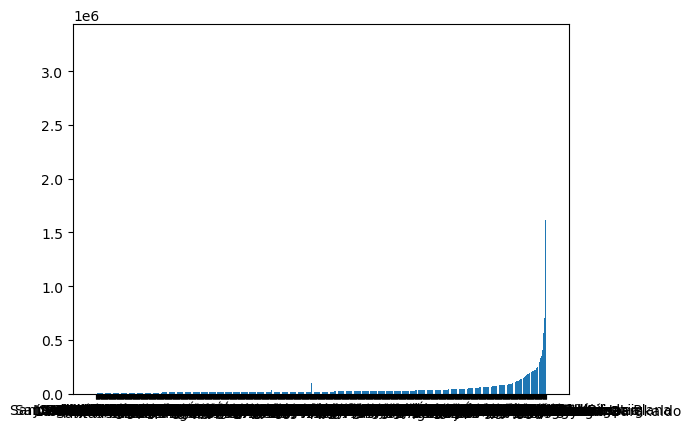

In [9]:
df_pob = df_nucleos.sort_values(by=['Poblacion'])
plt.bar(df_pob['Texto'],
               df_pob['Poblacion'])

In [10]:
df_pob.iloc[len(df_pob)-2]

FID                623
OBJECTID           624
Texto        Barcelona
Poblacion    1619337.0
CodMun            8019
Municipio    Barcelona
CodProvin            8
Provincia    Barcelona
X             2.176349
Y            41.384247
Name: 623, dtype: object

#### (a) ¿Cuál es la segunda ciudad más poblada?
La segunda ciudad más poblada es Barcelona.

In [11]:
df_pob = df_pob.reset_index(drop=True)
df_pob[df_pob['Texto'] == 'Granada'].index

Int64Index([834], dtype='int64')

#### (b) ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
La ciudad de Granada es la ciudad número 835 más poblada, de menor a mayor población.

### Ejercicio 3

In [12]:
print(df_pob[df_pob['Provincia'] == 'Extremadura'])

Empty DataFrame
Columns: [FID, OBJECTID, Texto, Poblacion, CodMun, Municipio, CodProvin, Provincia, X, Y]
Index: []


Debido a que la Provincia Extremadura no se encuentra en la base de datos no podemos saber cuáles de sus municipios cuentan con más de 5000 habitantes.

### Ejercicio 4

In [13]:
max_Y = df_pob['Y'].idxmax()
print(df_pob.iloc[[max_Y]])

     FID  OBJECTID    Texto  Poblacion  CodMun Municipio  CodProvin Provincia  \
317  104       105  Viveiro    16211.0   27066   Viveiro         27      Lugo   

            X          Y  
317 -7.588768  43.625578  


De esto podemos ver que el Municipio más al norte es Viveiro.

### Ejercicio 5

In [14]:
granada = df_pob[df_pob['Provincia'] == 'Granada']
granada = granada.reset_index(drop=True)

print(granada['Poblacion'].describe())

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


Podemos ver que la información de la siguiente manera:
* Media = 30217.85
* Desviación estándar = 50355.49
* Mínimo = 10386.50
* Máximo = 239154.00

### Ejercicio 6

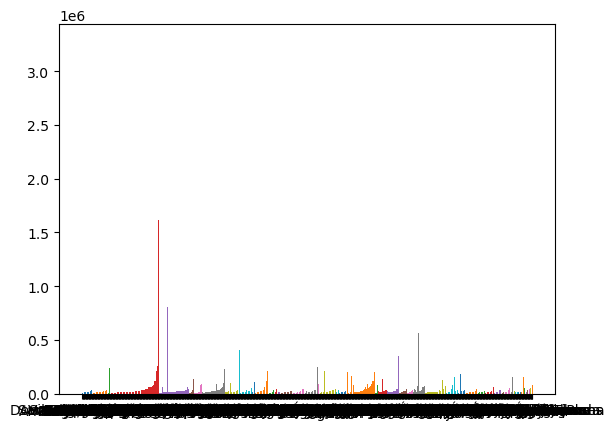

In [15]:
provincias = pd.unique(df_pob['Provincia'])

for prov in provincias:
    df_aux = df_pob[df_pob['Provincia'] == prov]
    plt.bar(df_aux['Municipio'],
            df_aux['Poblacion'])

### Ejercicio 7

In [16]:
num_aleatorios = rnd.sample(range(len(df_pob)),50)

prov_aleatorias = df_pob.iloc[num_aleatorios]
print(prov_aleatorias['Poblacion'].describe())

count        50.000000
mean      34963.260000
std       54838.460973
min       10245.000000
25%       12580.500000
50%       15388.000000
75%       25881.000000
max      315522.000000
Name: Poblacion, dtype: float64


De las 50 provincias aleatorias podemos ver lo siguiente:
* Media = 54976.54
* Desviación estándar = 106802.04